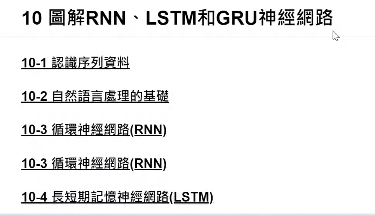
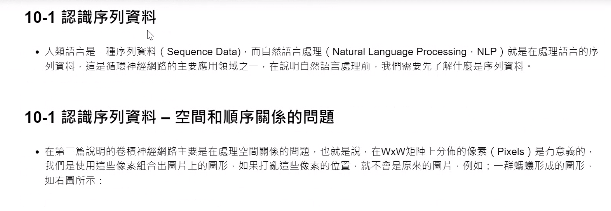
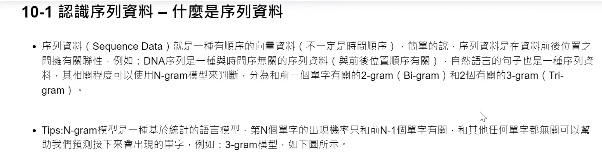
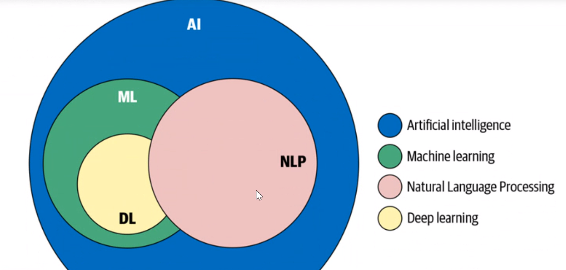
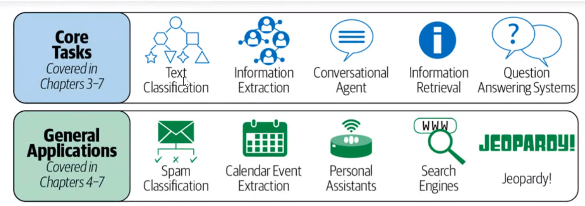
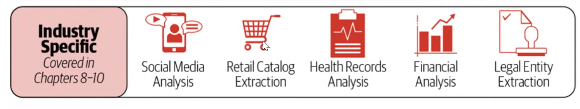
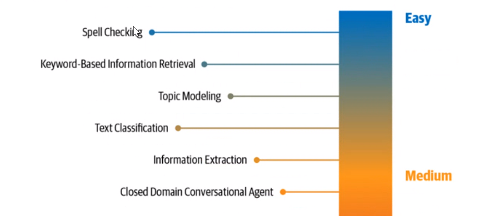
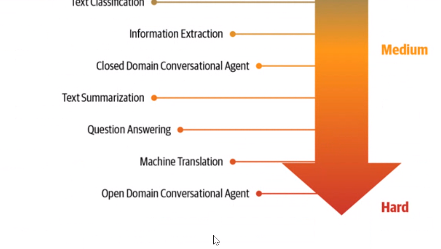
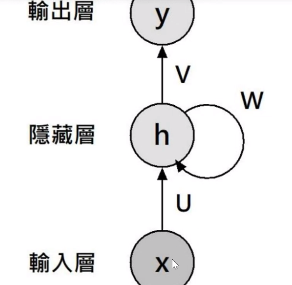
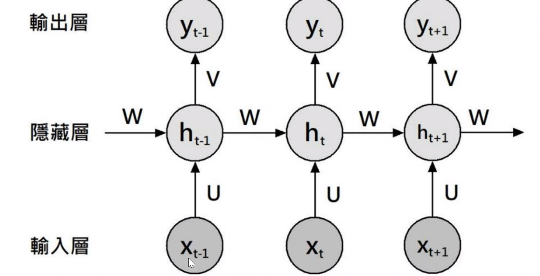
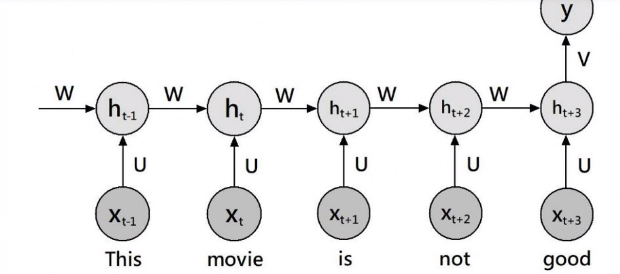
##### -------------------
#### 1vs. many
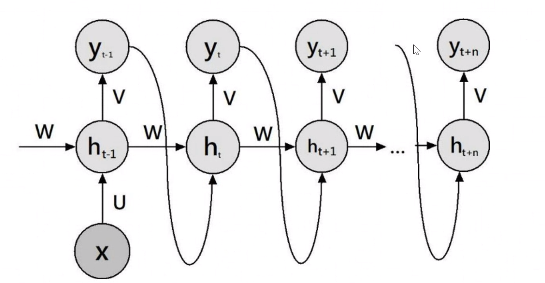
#### many vs. 1 (ex:正負評論
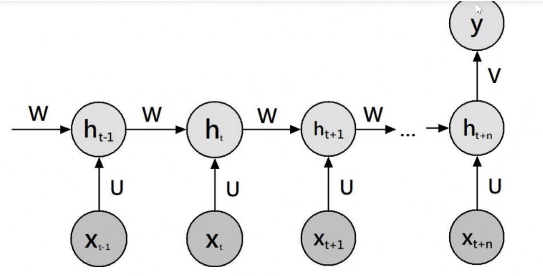
#### many vs. many (ex:翻譯
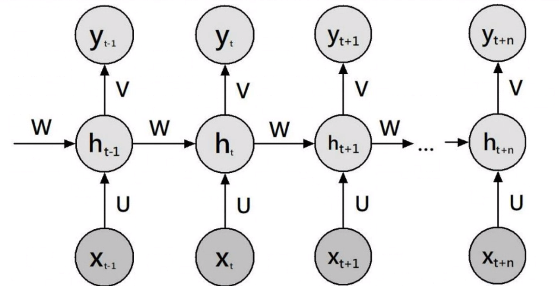


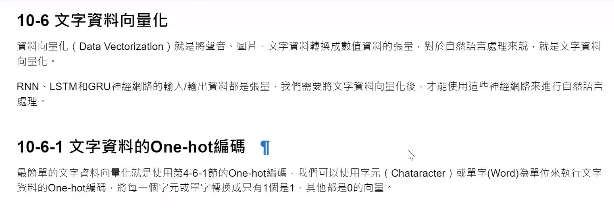
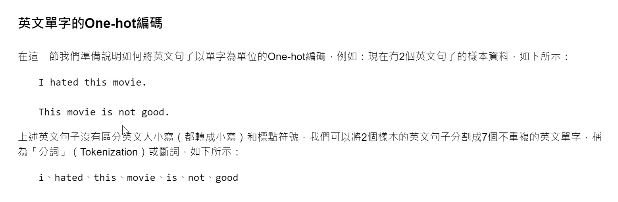
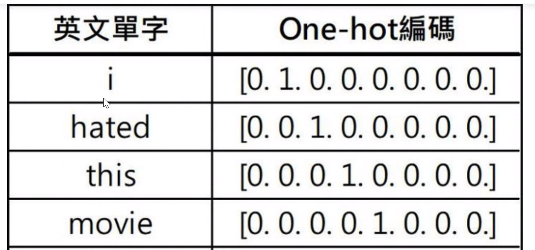

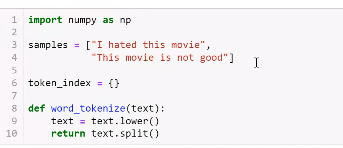

In [1]:
import numpy as np
samples=["I hated this movie",
         "This movie is not good"]

def word_tokenize(text):
    text=text.lower()
    return text.split()

print(word_tokenize("I hated this movie"))

['i', 'hated', 'this', 'movie']


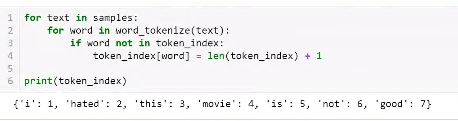

In [5]:
token_index={} #字典
for text in samples:
    for word in word_tokenize(text):
        if word not in token_index:
            token_index[word]=len(token_index)+1
print(token_index)

{'i': 1, 'hated': 2, 'this': 3, 'movie': 4, 'is': 5, 'not': 6, 'good': 7}


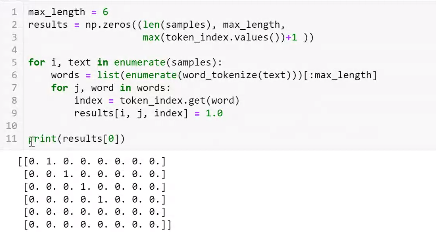

In [17]:
max_length=6 #一句話最多幾個字
results=np.zeros((len(samples),max_length, 
                  max(token_index.values())+1)) #2句話*6*8個字 矩陣

for i,text in enumerate(samples):
    words= list(enumerate(word_tokenize(text)))[:max_length]
    for j, word in words:
        index=token_index.get(word)
        results[i,j,index]=1.0

print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]]


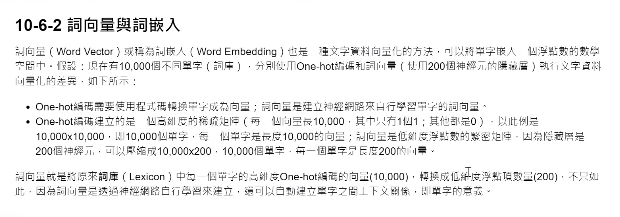
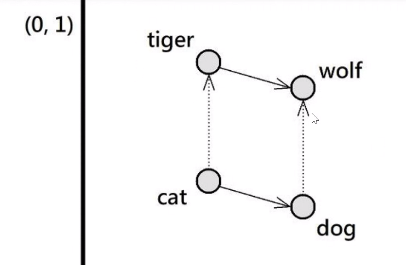

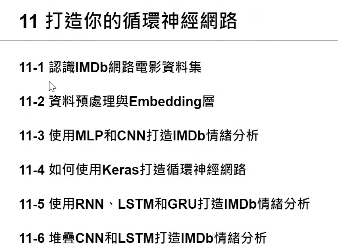
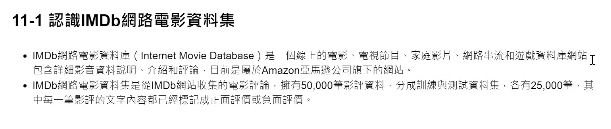


In [ ]:
from keras.dataset import imdb

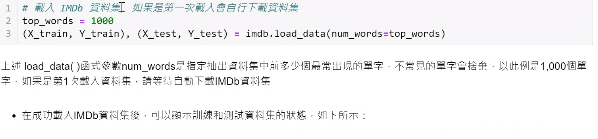

In [ ]:
top_words=1000
(X_train,Y_train),(X_test,Y_test)=imdb.load_data(num_words=top_words)

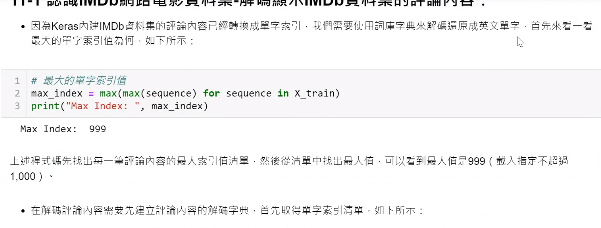

In [ ]:
max_index=max(max(sequence) for sequence in X_train)
print(max_index)

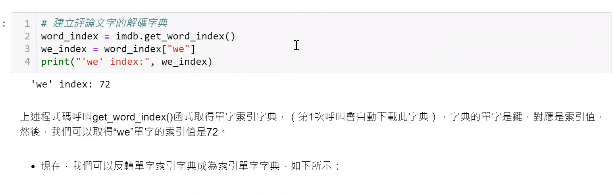
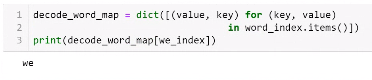
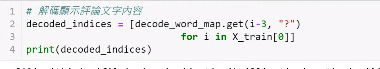
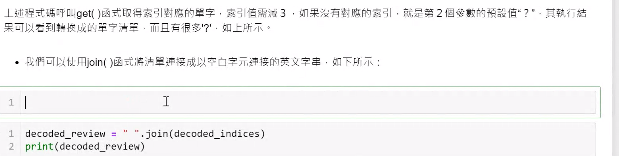

In [ ]:
word_index=imdb.get_word_index()
we_index=word_index["we"]
print(we_index)

In [ ]:
decode_word_map=dict([(value,key) for (key,value)
                      in word_index.items()])
print(decode_word_map[we_index])

In [ ]:
decode_indices=[decode_word_map.get(i*3,"?") for i in X_train[0]]
print(decode_indices)

In [ ]:
decode_review=" ".join(decode_indices)
print(decode_review)

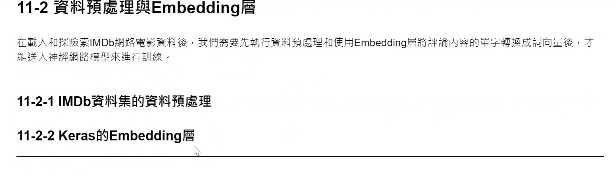
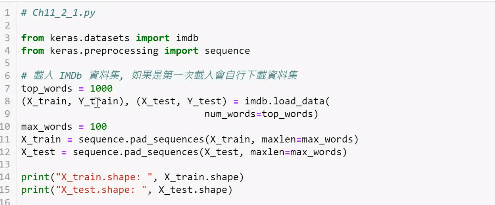

In [ ]:
from keras.dataset import imdb
from keras.preprocessing import sequence

top_words=1000
(X_train,Y_train),(X_test,Y_test)=imdb.load_data(num_words=top_words)

max_word=100
X_train=sequence.pad_sequences(X_train,maxlen=max_word)
X_test=sequence.pad_sequences(X_test,maxlen=max_word)

print(X_train,shape)
print(X_test,shape)
print(X_train[15001])#不夠100字 自動補0

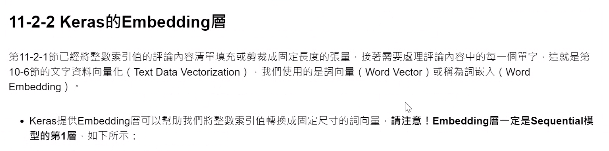
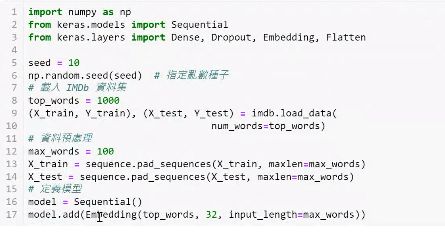

In [ ]:
import numpy as np
from keras.models import Sequenctial
from keras.layers import Dense,Dropout,Embedding,Flatten

top_words=1000
(X_train,Y_train),(X_test,Y_test)=imdb.load_data(num_words=top_words)

max_word=100
X_train=sequence.pad_sequences(X_train,maxlen=max_word)
X_test=sequence.pad_sequences(X_test,maxlen=max_word)

model=Sequenctial()
model.add=(Embedding(top_words,32,input_length=max_words)) #一定要第一個加


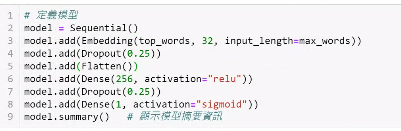

In [ ]:
model=Sequenctial()
model.add=(Embedding(top_words,32,input_length=max_words))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.summary()

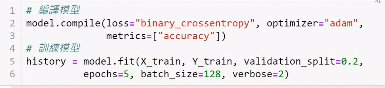

In [ ]:
model.compile(loss="binary_crossentropy",optimizer='adam',
              metrics=['accuracy'])
history=model.fit(X_train,Y_train,validation_split=0.2,
                 epochs=5,batch_size=128,verbose=2)

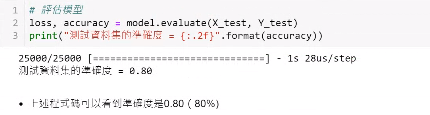

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

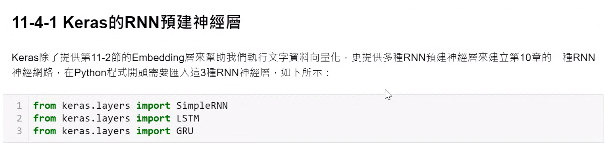
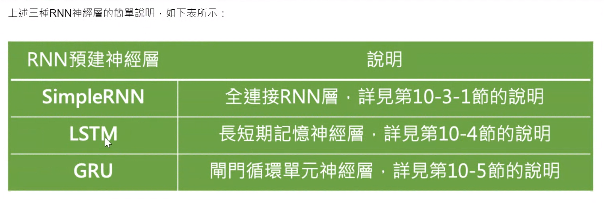
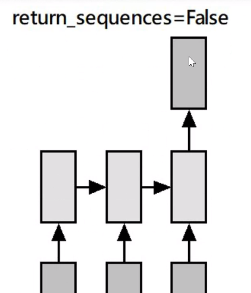
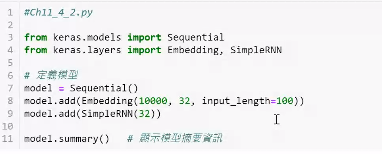
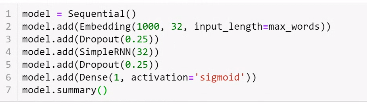

In [ ]:
from keras.models import Sequenctial
from keras.layers import Embedding,SimpleRNN

model=Sequenctial()
model.add=(Embedding(1000,32,input_length=100))
model.add(SimpleRNN(32))
model.summary()

In [ ]:
from keras.models import Sequenctial
from keras.layers import Embedding,SimpleRNN

model=Sequenctial()
model.add=(Embedding(1000,32,input_length=100))
model.add(Dropout(0.25))
model.add(SimpleRNN(32))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.summary()

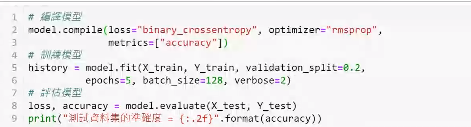

In [ ]:
model.compile(loss="binary_crossentropy",optimizer='rmsprop',
              metrics=['accuracy'])
history=model.fit(X_train,Y_train,validation_split=0.2,
                 epochs=5,batch_size=128,verbose=2)
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

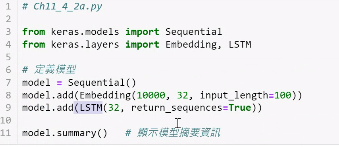


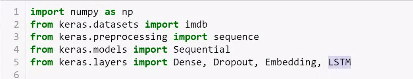
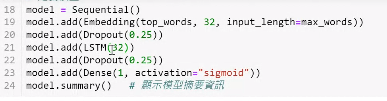

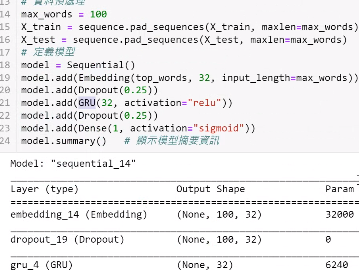